問題1. 請用鐵達尼的資料檔計算不同艙等的存活率？並用其視覺化呈現？
問題2. 請用鐵達尼的資料檔計算不同性別的存活率？並用其視覺化呈現？
問題3. 請用鐵達尼的資料檔計算不同票價的存活率？並用其視覺化呈現？
問題4. 請綜合評估三個因素，鐵達尼事件中哪一類身份的人存活率最高？


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
df = pd.crosstab(titanic["class"],titanic["sex"])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='class', ylabel='alive'>

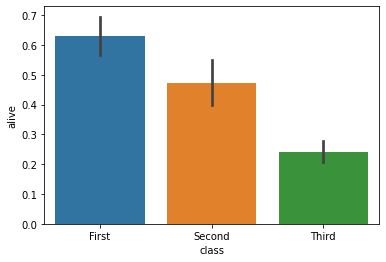

In [3]:
#問題一
titanic["alive"] = titanic["alive"].map({'yes':1,'no':0})
sns.barplot(x="class",y="alive",data=titanic)
#ax = sns.barplot(x="smoker",y="tip",data=titanic)


In [15]:
#問題二
ti_cross_n = pd.crosstab(titanic.sex,titanic.alive,normalize='index')
ti_cross_n

alive,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


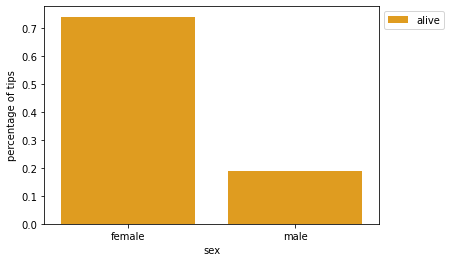

In [17]:
#問題二
f ,ax = plt.subplots()
sns.barplot(x=ti_cross_n.index,y=ti_cross_n[1],label="alive",color="orange")
#sns.barplot(x=ti_cross_n.index,y=ti_cross_n[0],bottom=ti_cross_n[1],label="notalive",color="darkblue")
plt.ylabel("percentage of tips")
ax.legend(loc="upper left",bbox_to_anchor=(1,1))

In [21]:
#問題三
ti_cross_f = pd.crosstab(titanic.fare,titanic.alive,normalize='index')
ti_cross_f

alive,0,1
fare,,
0.0000,0.933333,0.066667
4.0125,1.000000,0.000000
5.0000,1.000000,0.000000
6.2375,1.000000,0.000000
6.4375,1.000000,0.000000
...,...,...
227.5250,0.250000,0.750000
247.5208,0.500000,0.500000
262.3750,0.000000,1.000000


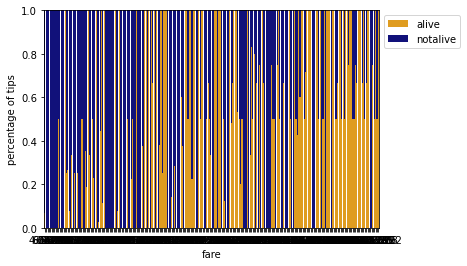

In [25]:
#問題三
f ,ax = plt.subplots()
sns.barplot(x=ti_cross_f.index,y=ti_cross_f[1],label="alive",color="orange")
sns.barplot(x=ti_cross_f.index,y=ti_cross_n[0],bottom=ti_cross_f[1],label="notalive",color="darkblue")
plt.ylabel("percentage of tips")
ax.legend(loc="upper left",bbox_to_anchor=(1,1))

#問題四

 頭等艙、女生、票價最高者